In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="SimHei.ttf", size=14)

In [4]:
index_df = pd.read_csv('SSE.csv')
df = pd.read_csv('主动买入成交占比.csv')
index_df = index_df.sort_values(by='trade_date', ascending=True).loc[:, ['trade_date', 'close']].rename(columns={'trade_date': '交易日期', 'close': 'SSE close'})
index_df['交易日期'] = pd.to_datetime(index_df['交易日期'], format='%Y%m%d')
df['交易日期'] = pd.to_datetime(df['交易日期'])
df = df.merge(index_df, on='交易日期')

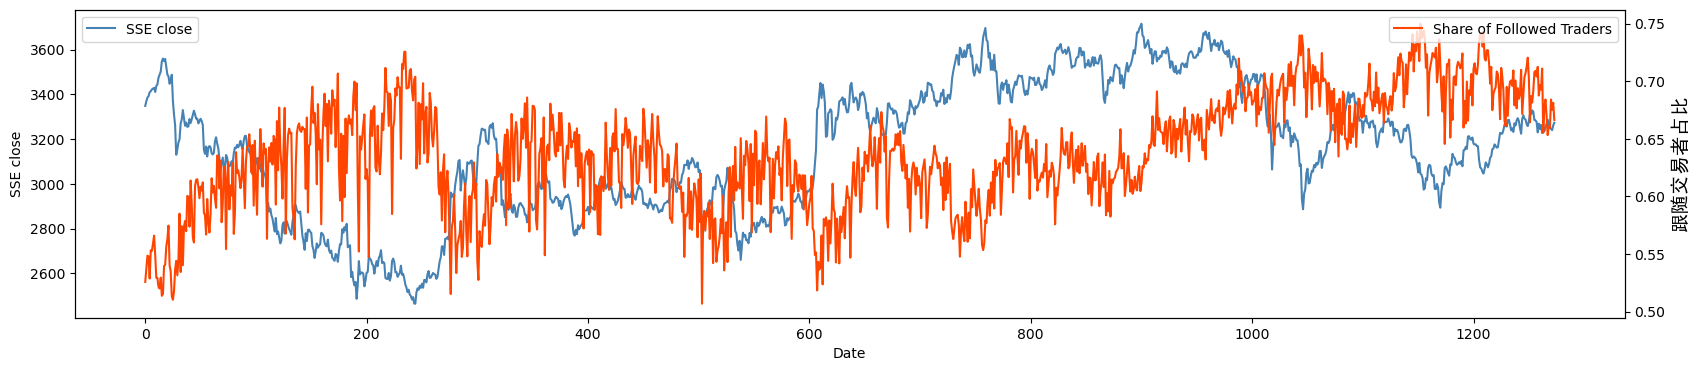

In [13]:
fig, ax1 = plt.subplots(figsize=(20, 4), dpi=100)  # 绘制折线图

ax1.plot(df['SSE close'], color='steelblue', label='SSE close')  # 绘制第一个数据列
ax1.set_ylabel('SSE close')
# ax1.set_ylim(0, 100)  # 设置第一个子图的 y 轴范围
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # 添加第二个纵轴
ax2.plot(df['小单主动买入占比'], color='orangered', label='Share of Followed Traders')  # 绘制第二个数据列
ax2.set_ylabel('跟随交易者占比', fontproperties=font)
# ax2.set_ylim(0, 500)  # 设置第二个子图的 y 轴范围
ax2.legend(loc='upper right')

# plt.xticks(list(df.index[::100]))  # 设置横轴标签密度为每隔五天显示一个日期
ax1.set_xlabel('Date')  # 添加横轴标签

# 显示图表
plt.show()